In [1]:
import pandas as pd
import sklearn as sk
import numpy as np

In [2]:
data = pd.read_csv("bank_customer_churn.csv")
data = data.drop(["RowNumber"],axis=1)

In [6]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# See if I have to dummize the surname column
# Seems no.
data["Surname"].value_counts()

Smith          32
Scott          29
Martin         29
Walker         28
Brown          26
Shih           25
Genovese       25
Yeh            25
Maclean        24
Wright         24
White          23
Ma             23
Wilson         23
Fanucci        23
Moore          22
Chu            22
Wang           22
Lu             22
Johnson        22
McGregor       21
Sun            21
Thompson       21
Mai            21
Miller         20
Hughes         20
Lo             20
Trevisani      20
Jamieson       20
Graham         20
Kennedy        20
               ..
Sanchez         1
Peavy           1
Souter          1
Outhwaite       1
Humffray        1
Potts           1
Bales           1
Donoghue        1
Armfield        1
Abrego          1
Higinbotham     1
Kendall         1
Ardis           1
Steere          1
Ingle           1
Eidson          1
Guerin          1
Brierly         1
Mitchel         1
Schatz          1
Lea             1
Frederick       1
Morant          1
Nyhan           1
Nicolay   

In [9]:
# See if I have to dummize the surname column
# Seems yes.
data["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [3]:
todummy = ['Geography','Gender']
# Get Dummies
data = pd.get_dummies(data, columns=todummy, drop_first=True)

In [4]:
# Check if that's going well
data.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [5]:
# Do the split on columns
X = data.drop(['CustomerId','Surname','Exited'],axis=1)
Y = data['Exited']

In [12]:
# Do the random split
from sklearn.cross_validation import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.75)

In [13]:
# Scales the data
# Source: http://scikit-learn.org/stable/modules/neural_networks_supervised.html
# Section 1.17.8
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Using NN
# First trying out the official example
# Source: http://scikit-learn.org/stable/modules/neural_networks_supervised.html
# Section 1.17.2
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, Y_train)

C:\Users\jerry\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [23]:
Y_predict = clf.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
# cross_fold_accr = cross_val_score(clf, X, Y, scoring="accuracy", cv=10)
# print(np.mean(cross_fold_accr))

# Since we have divided the dataset before, no need to use cross fold score again.
print("Accuracy =", accuracy_score(Y_test,Y_predict))

Accuracy = 0.8489333333333333


In [46]:
# Using Grid Search To Find the Best Parameter automatically
# Setting hidden layer: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
from sklearn.grid_search import GridSearchCV
a = 10.0 ** -np.arange(1, 7)
param_grids = {'activation':['identity', 'logistic', 'tanh', 'relu'],'alpha':a, 
               'hidden_layer_sizes':[(5,),(8,),(10,),(12,),(15,),(50,),(5,2),(10,2),(10,5),(8,3)]}
grid = GridSearchCV(MLPClassifier(), param_grid=param_grids, cv=5)
grid.fit(X,Y)
grid.grid_scores_, grid.best_params_, grid.best_score_

([mean: 0.55940, std: 0.18264, params: {'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': (5,)},
  mean: 0.69480, std: 0.10854, params: {'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': (8,)},
  mean: 0.61320, std: 0.23719, params: {'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': (10,)},
  mean: 0.70610, std: 0.12539, params: {'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': (12,)},
  mean: 0.73540, std: 0.04936, params: {'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': (15,)},
  mean: 0.73940, std: 0.11381, params: {'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': (50,)},
  mean: 0.64390, std: 0.12730, params: {'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': (5, 2)},
  mean: 0.57280, std: 0.22576, params: {'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': (10, 2)},
  mean: 0.70670, std: 0.12820, params: {'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': (10, 5)},
  mean:

In [35]:
# Using NN
# First trying out the official example
# Source: http://scikit-learn.org/stable/modules/neural_networks_supervised.html
# Section 1.17.2
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(12,))
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
print("Accuracy =", accuracy_score(Y_test,Y_predict))

Accuracy = 0.8444


C:\Users\jerry\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [37]:
# Using the best parameter to create ROC curve

best_clf = MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(12,))
best_clf.fit(X_train, Y_train)

clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
print("Accuracy =", accuracy_score(Y_test,Y_predict))

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Y_test_probabilities = best_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_probabilities)
auc = roc_auc_score(Y_test, Y_test_probabilities)
print("AUC =",auc)

C:\Users\jerry\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy = 0.8497333333333333
AUC =  0.8508128981710691


In [38]:
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

Model = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')  Accuracy = 0.7942666666666667 AUC = 0.6864908529094604
Model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)  Accuracy = 0.8132 AUC = 0.7610742725615186
Model = MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(12,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
    

C:\Users\jerry\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


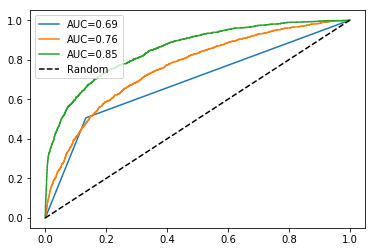

In [45]:
# Compare to a regular decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

tree = DecisionTreeClassifier(criterion="entropy")
logestic = LogisticRegression()

models = [tree, logestic, best_clf]

for model in models:
    model.fit(X_train, Y_train)
    Y_predicted = model.predict(X_test)
    accuracy = accuracy_score(Y_predicted, Y_test)
    Y_test_probabilities = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test, Y_test_probabilities)
    auc = roc_auc_score(Y_test, Y_test_probabilities)
    print('Model =', str(model),' Accuracy =',accuracy,'AUC =',auc)
    plt.plot(fpr, tpr, label="AUC=" + str(round(auc,2)))
    
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc=2)
plt.show()

## Conclusion
Compared to Decision Tree, Multi-layer perceptron NN (MLP) with Stochastic Gradient Descent can get a better result in accuracy as well in AUC.